<a href="https://colab.research.google.com/github/fisherj1/NN/blob/master/les1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf

In [68]:
mnist = tf.keras.datasets.mnist

In [69]:
import matplotlib.pyplot as plt


In [70]:
def feature_normalize(train_X):
    global mean, std
    mean = np.mean(train_X, axis=0)
    std = np.std(train_X, axis=0)

    return np.nan_to_num((train_X - mean) / std)

In [74]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = tf.keras.utils.normalize(x_train), tf.keras.utils.normalize(x_test)

In [75]:
x_train.shape

(60000, 28, 28)

In [76]:
x_test.shape

(10000, 28, 28)

In [77]:
y_train[0]

5

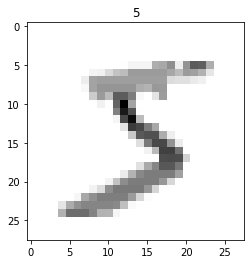

In [78]:
plt.title(y_train[0])
plt.imshow(x_train[0], cmap=plt.get_cmap('gray_r'))
plt.show()

In [79]:
def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

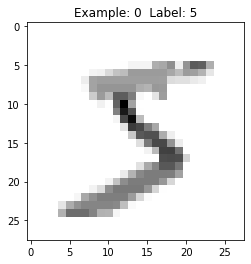

In [80]:
display_digit(0)

In [81]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [82]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [83]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3320 - accuracy: 0.9057
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1551 - accuracy: 0.9537
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9677


In [84]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9669
Loss = 0.1051955446600914, accuracy = 0.9668999910354614


In [85]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0837 - accuracy: 0.9755
Loss = 0.08368373662233353, accuracy = 0.9754999876022339


In [66]:
predictions = model.predict(x_test[0:1,:,:])
print(predictions)
print(y_test[0])

[[0.11061787 0.05892543 0.08546117 0.08190876 0.10409772 0.08149996
  0.09589211 0.06159884 0.21804205 0.10195608]]
7


Закончен эксперимент 1